Md. Tanvir Jawad<br>ID: 21101221

In [1]:
from sympy import symbols, Eq, solve

T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')
eq1 = Eq(a, -r * alpha)
eq2 = Eq(T - m*g, m * a)
eq3 = Eq(T * r, I * alpha)
soln = solve([eq1, eq2, eq3], [T, a, alpha])
soln

{T: I*g*m/(I + m*r**2), a: -g*m*r**2/(I + m*r**2), alpha: g*m*r/(I + m*r**2)}

In [2]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.0 MB/s eta 0:00:00


In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/modsim.py')

Downloaded modsim.py


In [4]:
from modsim import *

In [5]:
from sympy import symbols, Eq, solve

T, a, alpha, I, m, g, r = symbols('T a alpha I m g r')

In [6]:
eq1 = Eq(a, -r * alpha)
eq1

Eq(a, -alpha*r)

In [7]:
eq2 = Eq(T - m * g, m * a)
eq2

Eq(T - g*m, a*m)

In [8]:
eq3 = Eq(T * r, I * alpha)
eq3

Eq(T*r, I*alpha)

In [9]:
soln = solve([eq1, eq2, eq3], [T, a, alpha])

In [10]:
soln[T]

I*g*m/(I + m*r**2)

In [11]:
soln[a]

-g*m*r**2/(I + m*r**2)

In [12]:
soln[alpha]

g*m*r/(I + m*r**2)

In [13]:
Rmin = 8e-3     # m
Rmax = 16e-3    # m
Rout = 35e-3    # m
mass = 50e-3    # kg
L = 1           # m
g = 9.8         # m / s**2

In [14]:
1 / (Rmax)

62.5

In [15]:
I = mass * Rout**2 / 2
I

3.0625000000000006e-05

In [16]:
k = (Rmax**2 - Rmin**2) / 2 / L
k

9.6e-05

In [17]:
init = State(theta=0, omega=0, y=L, v=0)

In [18]:
system = System(init=init, t_end=2)

In [19]:
from scipy.integrate import solve_ivp
from sympy import symbols, Eq, solve, sqrt

Rmin = 8e-3
Rmax = 16e-3
Rout = 35e-3
mass = 50e-3
L = 1
g = 9.8

I = mass * Rout**2 / 2

k = (Rmax**2 - Rmin**2) / (2 * L)

theta0, omega0, y0, v0 = 0, 0, L, 0

t_end = 2

In [23]:
def slope_func(t, state):
    theta, omega, y, v = state
    r = sqrt(max(2*k*y + Rmin**2, 0))

    T, a, alpha = symbols('T a alpha')
    eq1 = Eq(a, -r * alpha)
    eq2 = Eq(T - mass * g, mass * a)
    eq3 = Eq(T * r, (I + mass * r**2) * alpha)
    soln = solve([eq1, eq2, eq3], [T, a, alpha])

    a_value = float(soln[a])
    alpha_value = float(soln[alpha])

    dtheta_dt = omega
    domega_dt = alpha_value
    dy_dt = -r * omega
    dv_dt = a_value

    return [dtheta_dt, domega_dt, dy_dt, dv_dt]

In [24]:
def event_func(t, state):
    _, _, y, _ = state
    return y

In [25]:
event_func.terminal = True

# Running the simulation again with the corrected slope function
sol = solve_ivp(slope_func, [0, t_end], [theta0, omega0, y0, v0], events=event_func)

# Final state and time
final_state = sol.y[:, -1]
final_time = sol.t[-1]
final_state, final_time

(array([ 8.34043931e+01,  1.46023855e+02,  5.55111512e-17, -1.96571281e+00]),
 1.104209648472647)

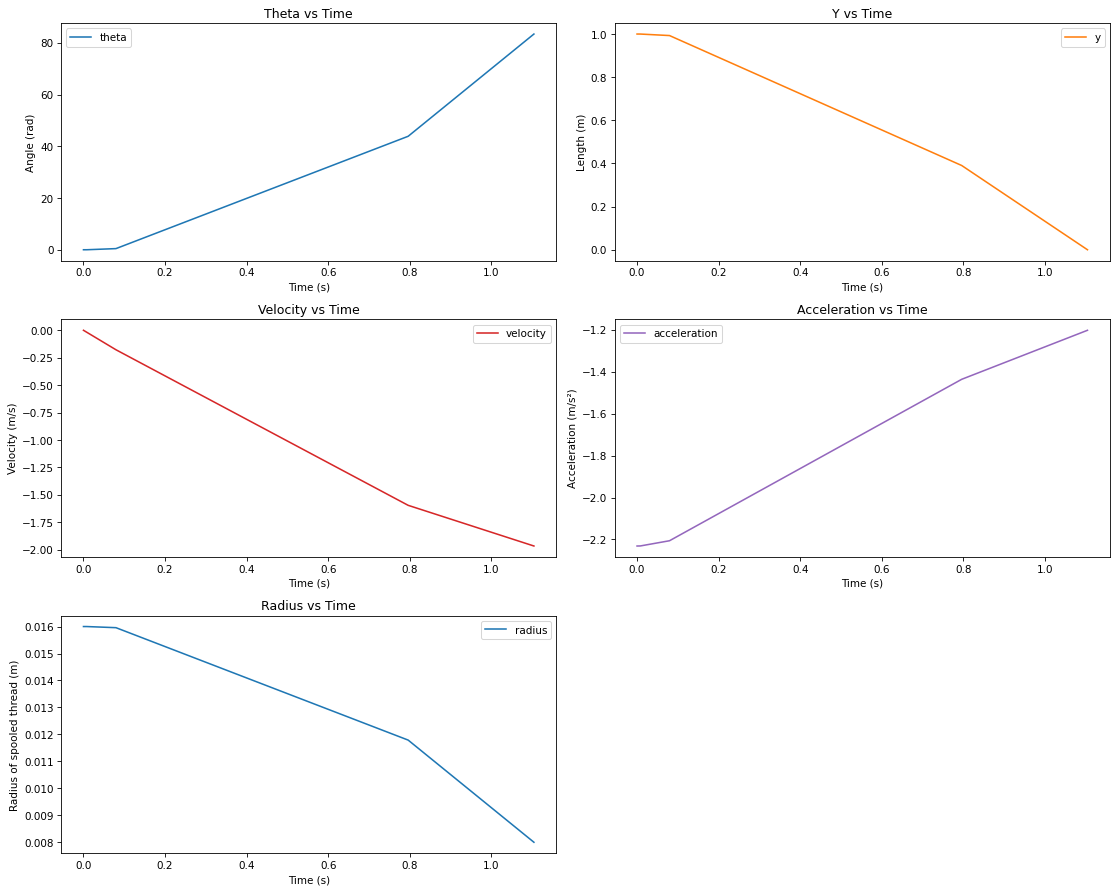

In [27]:
import matplotlib.pyplot as plt
time = sol.t
theta = sol.y[0]
y = sol.y[2]
v = sol.y[3]

a = np.gradient(v, time)
r = np.sqrt(2 * k * y + Rmin**2)
plt.figure(figsize=(15, 12))

# Theta vs Time
plt.subplot(3, 2, 1)
plt.plot(time, theta, color='C0', label='theta')
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.title('Theta vs Time')
plt.legend()

# Y vs Time
plt.subplot(3, 2, 2)
plt.plot(time, y, color='C1', label='y')
plt.xlabel('Time (s)')
plt.ylabel('Length (m)')
plt.title('Y vs Time')
plt.legend()

# Velocity vs Time
plt.subplot(3, 2, 3)
plt.plot(time, v, color='C3', label='velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend()

# Acceleration vs Time
plt.subplot(3, 2, 4)
plt.plot(time, a, color='C4', label='acceleration')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s²)')
plt.title('Acceleration vs Time')
plt.legend()

# Radius of Spooled Thread vs Time
plt.subplot(3, 2, 5)
plt.plot(time, r, label='radius')
plt.xlabel('Time (s)')
plt.ylabel('Radius of spooled thread (m)')
plt.title('Radius vs Time')
plt.legend()

plt.tight_layout()
plt.show()
